<a href="https://colab.research.google.com/github/zlrs1013/IMGS210_MathForImaging/blob/main/finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent Visualization ##

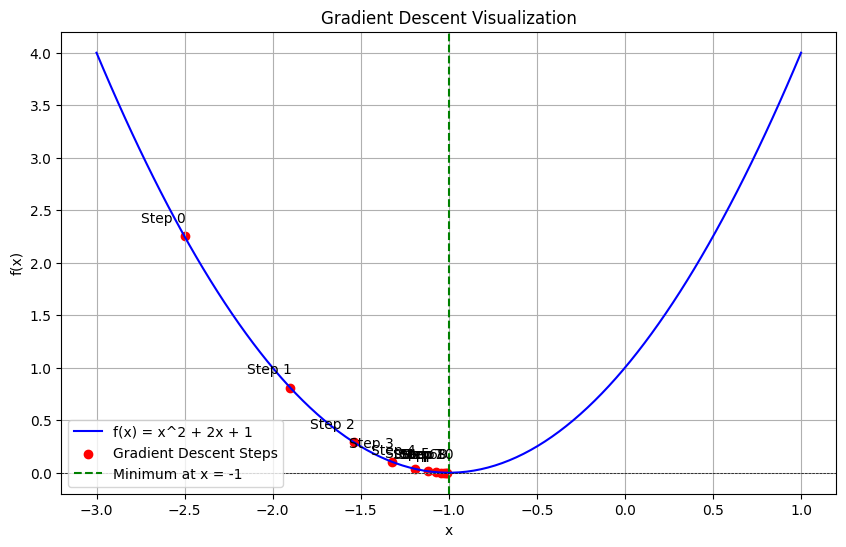

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function and its derivative
def f(x):
    return x**2 + 2*x + 1  # A simple convex function

def df(x):
    return 2*x + 2  # Derivative of the function

# Generate x values for the plot
x = np.linspace(-3, 1, 100)
y = f(x)

def gradient_descent_demo(start_x, learning_rate, steps):
    """Visualize gradient descent on the function."""
    x_vals = [start_x]
    f_vals = [f(start_x)]

    for _ in range(steps):
        grad = df(x_vals[-1])
        new_x = x_vals[-1] - learning_rate * grad
        x_vals.append(new_x)
        f_vals.append(f(new_x))

    return x_vals, f_vals

# Initial parameters for gradient descent
start_x = -2.5
learning_rate = 0.2
steps = 10

# Perform gradient descent
x_vals, f_vals = gradient_descent_demo(start_x, learning_rate, steps)

# Plot the function and gradient descent steps
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = x^2 + 2x + 1", color="blue")
plt.scatter(x_vals, f_vals, color="red", label="Gradient Descent Steps")

# Annotate gradient descent steps
for i, (x_val, f_val) in enumerate(zip(x_vals, f_vals)):
    plt.annotate(f"Step {i}", (x_val, f_val), textcoords="offset points", xytext=(-15, 10), ha='center')

plt.title("Gradient Descent Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(-1, color='green', linestyle='--', label="Minimum at x = -1")
plt.legend()
plt.grid()
plt.show()


## Implementation of MB-SGD for a Linear Neural Network for Regression ##

The following PyTorch code demonstrates how minibatch SGD is used to optimize a linear neural network for regression:


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 2)  # 100 samples, 2 features
true_W = torch.tensor([[2.0], [-3.0]])  # True weights
true_b = torch.tensor([1.0])  # True bias
y = X @ true_W + true_b + 0.1 * torch.randn(100, 1)  # Add some noise

# Define a simple linear regression model
model = nn.Linear(2, 1)  # 2 input features, 1 output

# Define the loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Create DataLoader for minibatch SGD
batch_size = 10
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Training loop
epochs = 100
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        # Forward pass
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        # Backward pass and parameter update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Display learned parameters
print("Learned weights:", model.weight)
print("Learned bias:", model.bias)


## Backpropagation in an MLP ##

This code defines an MLP with a hidden layer, computes the loss, backpropagates the gradients, and updates the weights. The loss.backward() function automatically computes all the gradients using backpropagation based on the computational graph.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h = self.activation(self.hidden_layer(x))  # Hidden layer with activation
        z = self.output_layer(h)  # Output layer
        return z

# Define model, loss, and optimizer
input_size, hidden_size, output_size = 2, 4, 1
model = MLP(input_size, hidden_size, output_size)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Example data
x = torch.tensor([[1.0, 2.0]], requires_grad=True)  # Input
y = torch.tensor([[3.0]])  # Target

# Forward pass
z = model(x)
loss = loss_fn(z, y)

# Backward pass
loss.backward()

# Display gradients
print("Gradients for weights and biases:")
for name, param in model.named_parameters():
    print(f"{name}: {param.grad}")

# Update parameters
optimizer.step()

# Clear gradients for next iteration
optimizer.zero_grad()


Gradients for weights and biases:
hidden_layer.weight: tensor([[ 0.0000,  0.0000],
        [ 0.4030,  0.8061],
        [ 0.6967,  1.3934],
        [-1.0325, -2.0651]])
hidden_layer.bias: tensor([ 0.0000,  0.4030,  0.6967, -1.0325])
output_layer.weight: tensor([[ 0.0000, -4.0649, -6.0390, -4.9152]])
output_layer.bias: tensor([-6.1989])


## Modern Deep Learning Framework ##

PyTorch exemplifies how frameworks implement this process. When defining a model in PyTorch, tensors that require gradient computation are flagged with requires_grad=True. During the forward pass, all operations involving these tensors are recorded in a dynamic computational graph.

During the forward pass, PyTorch dynamically builds the computational graph as operations are executed. This graph is then used for gradient computation.

In [ ]:
import torch

# Define inputs and parameters
x = torch.tensor([[1.0, 2.0]], requires_grad=True)  # Input tensor
W = torch.tensor([[0.5, -1.0], [1.0, 0.5]], requires_grad=True)  # Weight tensor
b = torch.tensor([0.0, 1.0], requires_grad=True)  # Bias tensor

# Forward pass
z = x @ W + b  # Linear transformation
y = torch.tensor([[0.0, 1.0]])  # Target output
loss = ((z - y) ** 2).mean()  # Mean squared error loss

# Backward pass
loss.backward()

# Gradients are now computed and stored in the .grad attribute of each tensor
print("Gradient of W:", W.grad)
print("Gradient of b:", b.grad)


Gradient of W: tensor([[2.5000, 0.0000],
        [5.0000, 0.0000]])
Gradient of b: tensor([2.5000, 0.0000])
